In [1]:
#biblioteki i funkcje
SEED_NUM=0
import os 
os.environ['PYTHONHASHSEED']=str(SEED_NUM)


import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import winsound
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,LSTM
from tensorflow.keras.activations import relu, elu, sigmoid
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adagrad, Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import datetime as dt 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def write(frame,name):
    writer=pd.ExcelWriter(name+'.xlsx')
    frame.to_excel(writer)
    writer.save()
    
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(SEED_NUM)
    tf.random.set_seed(SEED_NUM)    
    np.random.seed(SEED_NUM)
    random.seed(SEED_NUM)

C:\Users\student\AppData\Local\Temp\ipykernel_13040\3168963534.py:20: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#wczytywanie przykładowej ramki danych
data=pd.read_excel('df_ex.xlsx')

#Nomalizacja zmiennych
data['A']=data['A']/100
data['B']=data['B']/100
data['Res']=data['Res']/10000

#podział danych na treningowe/walidaycjne/testowe
df_tr_in=data.loc[0:74,['A','B']]
df_val_in=data.loc[75:100,['A','B']]
df_test_in=data.loc[101:200,['A','B']]

df_tr_out=data.loc[0:74,'Res']
df_val_out=data.loc[75:100,'Res']
df_test_out=data.loc[101:200,'Res']

#przeformatowanie danych na postać macierzy 3D do lstm
tr_samples_num=len(df_tr_in)
in_tr=df_tr_in.values.reshape(tr_samples_num,1,len(df_tr_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_tr=df_tr_out.values.reshape(tr_samples_num,1,1)

val_samples_num=len(df_val_in)
in_val=df_val_in.values.reshape(val_samples_num,1,len(df_val_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_val=df_val_out.values.reshape(val_samples_num,1,1)

test_samples_num=len(df_test_in)
in_test=df_test_in.values.reshape(test_samples_num,1,len(df_test_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_test=df_test_out.values.reshape(test_samples_num,1,1)

In [3]:
np.shape(in_tr)

(75, 1, 2)

In [4]:
#in_tr

In [5]:
#out_tr

In [6]:
data

,A,B,Res
0,0.90,0.49,0.4410
1,0.09,0.90,0.0810
2,0.59,0.73,0.4307
3,0.35,0.74,0.2590
4,0.75,0.08,0.0600
...,...,...,...
195,0.30,0.38,0.1140
196,0.90,0.88,0.7920
197,0.11,0.11,0.0121
198,0.05,0.56,0.0280


Epoch 1/200
1/1 [==============================] - 1s 929ms/step - loss: 0.2735 - val_loss: 0.2936
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2712 - val_loss: 0.2913
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2691 - val_loss: 0.2891
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2669 - val_loss: 0.2868
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2649 - val_loss: 0.2846
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2628 - val_loss: 0.2823
Epoch 7/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2609 - val_loss: 0.2801
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2590 - val_loss: 0.2779
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2571 - val_loss: 0.2757
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 0.2552 - val_loss: 0.2735
Epoch 11/200
1/1 [=

1/1 [==============================] - 0s 16ms/step - loss: 0.1794 - val_loss: 0.1666
Epoch 85/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1787 - val_loss: 0.1658
Epoch 86/200
1/1 [==============================] - 0s 16ms/step - loss: 0.1781 - val_loss: 0.1650
Epoch 87/200
1/1 [==============================] - 0s 0s/step - loss: 0.1775 - val_loss: 0.1642
Epoch 88/200
1/1 [==============================] - 0s 0s/step - loss: 0.1769 - val_loss: 0.1633
Epoch 89/200
1/1 [==============================] - 0s 0s/step - loss: 0.1762 - val_loss: 0.1626
Epoch 90/200
1/1 [==============================] - 0s 0s/step - loss: 0.1756 - val_loss: 0.1619
Epoch 91/200
1/1 [==============================] - 0s 0s/step - loss: 0.1750 - val_loss: 0.1613
Epoch 92/200
1/1 [==============================] - 0s 7ms/step - loss: 0.1743 - val_loss: 0.1607
Epoch 93/200
1/1 [==============================] - 0s 16ms/step - loss: 0.1737 - val_loss: 0.1601
Epoch 94/200
1/1 [================

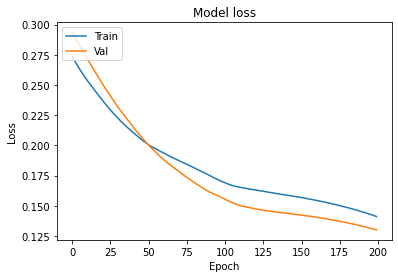

CPU times: total: 9.78 s
Wall time: 11.4 s


In [7]:
%%time
# manualne lstm

#model

reset_random_seeds()


model = Sequential()
#(timesteps, data_dim)

model.add(LSTM(8,return_sequences=True, input_shape=(in_tr.shape[1],in_tr.shape[2]),activation='tanh'))
#model.add(Dense(8,input_shape=(in_tr.shape[1],in_tr.shape[2]),activation='tanh'))
#model.add(LSTM(8,return_sequences=True, activation='tanh'))
#model.add(Dropout(0.8))
#model.add(Dense(10, activation='relu'))
model.add(LSTM(4,return_sequences=True,activation='tanh'))
#model.add(LSTM(3,return_sequences=True,activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

#opt=  Adam(lr=1e-4, decay=1e-5)
#sgd = SGD(lr=0.001, clipvalue=0.5,nesterov=True,momentum=0.8,clipnorm=1.0)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.8, nesterov=True)
#opt = Adagrad(lr=0.01, epsilon=1e-6, decay=0.0) #ładny wykres loss, mae ~0.115
#opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#opt =Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
opt= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0001, amsgrad=True)
#opt= Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt=Ftrl(lr=0.001,learning_rate_power=-0.5,initial_accumulator_value=0.1,l1_regularization_strength=0.0,l2_regularization_strength=0.0,l2_shrinkage_regularization_strength=0.0,)
model.compile(loss='mae',optimizer=opt)

pat=20
epo=200

early_stopping =EarlyStopping(monitor='val_loss', patience=pat)
#instrukja uczenia modelu
history=model.fit(in_tr, out_tr,validation_data=(in_val,out_val),epochs=epo,batch_size=128,verbose=1,shuffle=True,callbacks=[early_stopping]) 
#instrukja walidacji modelu
score = model.evaluate(in_test, out_test, batch_size=128) #instrukcja testowania modelu

ucz=history.history['loss'][-1]
spr=history.history['val_loss'][-1]
prognosis=model.predict(in_test, batch_size=None, verbose=0, steps=None) #wpisać jak chce się wartości przewidywane uzyskać
print(f'MAE test [%] = {score*100} ,uczenie= {ucz*100}, sprawdz={spr*100}')

prognosis2=prognosis.flatten().tolist()
out_test2=out_test.flatten().tolist()
out=pd.DataFrame(list(zip(prognosis2,out_test2)))
out.columns=['prognosis','reals']

write(out,'prognoza_iter')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [8]:
#wczytywanie przykładowej ramki danych
data=pd.read_excel('df_ex.xlsx')


In [9]:
print(data)


      A   B   Res
0    90  49  4410
1     9  90   810
2    59  73  4307
3    35  74  2590
4    75   8   600
..   ..  ..   ...
195  30  38  1140
196  90  88  7920
197  11  11   121
198   5  56   280
199  72  75  5400

[200 rows x 3 columns]


In [10]:
data['abcd']=data['A'].apply( lambda x: x**2)

In [11]:
data['abcd']=data['czas'].dt.hour

KeyError: 'czas'

In [ ]:
pd.Timestamp('2022-05-01  05:00')

In [ ]:
aaa=pd.Timestamp('2022-05-01  05:00')

In [ ]:
dir(aaa)

In [ ]:
aaa.hour

In [ ]:
data.to_excel('aaa.xlsx')


In [ ]:
data.to_csv('aaa.csv')

In [ ]:
data.to_csv('aaa.txt')


In [ ]:
data['klucz']=1


In [ ]:
data

In [ ]:
aaa=data.copy()

bbb=data.copy()
bbb['klucz']=2

In [ ]:
aaa

In [ ]:
bbb

In [ ]:
zzz=pd.concat([aaa,bbb]).reset_index(drop=True)

In [ ]:
zzz[zzz['klucz'] ==1]

In [ ]:
df = pd.read_excel('energia.xlsx',index_col=0).iloc[:, :2]

In [ ]:
df

In [ ]:
df[ (df['Data']>=pd.Timestamp(2017,1,1)) &(df['Data']<=pd.Timestamp(2017,12,31,23))]